## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Пропущенных значений в наборе данных нет, категориальные переменные отсутсвуют

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

X_train, X_test, y_train, y_test  = train_test_split(X, y, \
                                                     test_size=0.3,\
                                                     shuffle=True,
                                                     random_state=0,
                                                     stratify=y)

Важно использовать аргумент stratify, чтобы получить равную выборку, то есть в тренировочной и тестовой выборках количество классов должно быть равномерно распределено, чтобы модель имела возможность обучиться на данных всех классов и затем пройти тест также на всех классах в равной степени.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [178]:
X_train_subset = X_train.iloc[:, [0, 4]]
X_test_subset = X_test.iloc[:, [0, 4]]

In [179]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_subset)
X_test = scaler.transform(X_test_subset)

In [180]:
X_train

array([[ 0.71225893, -0.50432733],
       [ 0.88229214,  2.34147876],
       [ 0.84585645,  0.13597904],
       [ 0.57866141,  0.77628541],
       [-0.52655446, -0.36203702],
       [-1.15810638, -1.07348855],
       [-0.98807317, -0.50432733],
       [-0.63586152, -1.00234339],
       [-0.41724739, -1.35806916],
       [-1.47388234, -0.93119824],
       [ 0.55437095, -0.86005309],
       [ 1.02803489,  0.13597904],
       [-0.32008556, -1.35806916],
       [-0.32008556, -0.93119824],
       [ 0.01998086, -0.07745642],
       [ 0.23859499, -0.07745642],
       [-1.25526821, -0.93119824],
       [ 0.7851303 ,  0.3494145 ],
       [ 0.82156599, -0.29089187],
       [ 0.55437095, -0.78890794],
       [-1.91111059,  0.56284995],
       [ 1.31952039, -0.29089187],
       [-1.72893215, -0.36203702],
       [-0.74516858,  0.20712419],
       [-1.92325582, -0.21974672],
       [ 0.09285224, -1.50035946],
       [ 0.05641655,  0.98972087],
       [ 1.24664902,  1.55888209],
       [ 1.00374443,

In [181]:
neighbors = [1, 3, 5, 10, 15, 25]
predictions = []

for n in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=n, p=2)
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    
    train_accuracy = round(np.mean(y_train == y_train_pred),2)
    test_accuracy = round(np.mean(y_test == y_test_pred),2)
    
    predictions.append((train_accuracy, test_accuracy))

predictions

/Users/ekaterinakulik/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ekaterinakulik/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

[(0.99, 0.7),
 (0.8, 0.74),
 (0.77, 0.76),
 (0.78, 0.78),
 (0.73, 0.72),
 (0.72, 0.74)]

In [182]:
data = {'NN': neighbors}

train_accuracies = [train_acc for train_acc, _ in predictions]
test_accuracies = [test_acc for _, test_acc in predictions]
data['Train'] = train_accuracies
data['Test'] = test_accuracies

accuracy = pd.DataFrame(data)
print(accuracy)

   NN  Train  Test
0   1   0.99  0.70
1   3   0.80  0.74
2   5   0.77  0.76
3  10   0.78  0.78
4  15   0.73  0.72
5  25   0.72  0.74


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [183]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [184]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [185]:
neighbors = [1, 3, 5, 10, 15, 25]
classifier = [KNeighborsClassifier(n_neighbors=n, p=2) for n in neighbors]
classifier

[KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(),
 KNeighborsClassifier(n_neighbors=10),
 KNeighborsClassifier(n_neighbors=15),
 KNeighborsClassifier(n_neighbors=25)]

/Users/ekaterinakulik/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ekaterinakulik/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

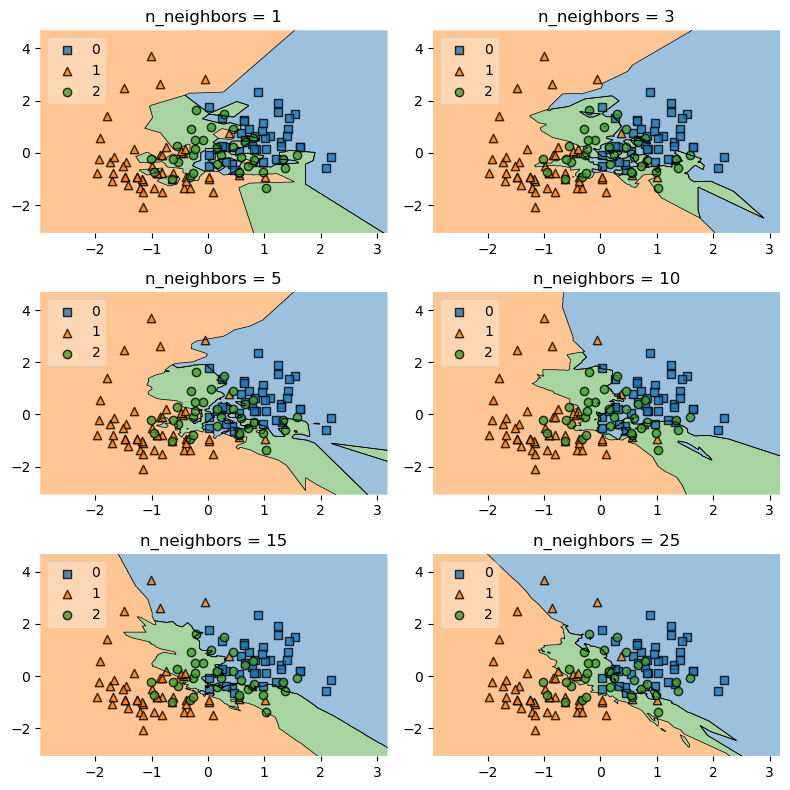

In [186]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(3, 2)
fig = plt.figure(figsize=(8, 8))

labels = ['n_neighbors = 1', 'n_neighbors = 3', 'n_neighbors = 5', 'n_neighbors = 10', 'n_neighbors = 15', 'n_neighbors = 25']
for clf, lab, grd in zip(classifier, 
                         labels, 
                         itertools.product([0, 1, 2], [0, 1])):
    
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.tight_layout()
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Из результатов в задаче 1.3 и первого рисунка в задании 1.5 можно заметить, что с числом соседей равным 1 модель явно переобучена, она показывает высокий результат на обучающей выборке (0.99) и относительно низкую (0.70) на тестовой, такую же фраагментацию мы видим и на графике
Касательно второго графика и соответсвенно числа соседей равным 3, заметна похожая картина, решающая поверхность хотя и максимально разделяет объекты разных классов, но все же не обеспечивает хорошую обобщающую способность модели, однако мы можем заметить относительную близость результатов точность на обучающей и тестовой выборках (0.80 и 0.74 соотвественно)
Оптимальным числом соседей является 5, точность на обучающей и тестовой выборках примерно равны (0.77 и 0.76 соответсвенно) и решающая поверхность достаточно разумно разделяет объекты на классы
Число соседей равным 10 тоже неплохо описывает данные

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

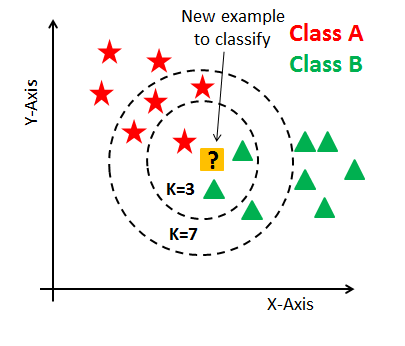

In [187]:
import numpy as np
from collections import Counter
from scipy.spatial import distance_matrix

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y= y

    def predict(self, X):
        y_predicted = np.zeros(X.shape[0])

        for i in range(X.shape[0]):
            distances = np.linalg.norm((self.X - X[i, :]), axis = 1)
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y[nearest_indices]
            y_predicted[i] = Counter(nearest_labels).most_common(1)[0][0]
            
        return y_predicted


    def count_distance(self, x, y):
        return np.sqrt(np.sum((x - y)**2))


In [188]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [189]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [6]:
data_diamond = pd.read_csv('diamonds.csv')
data_diamond.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [7]:
data_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
data_diamond = data_diamond.drop(columns = ['Unnamed: 0'])
data_diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Пропущенных значений нет, ненужные столбцы удалены.

**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [9]:
data_diamond.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


С целевой переменной (price) больше всего коррелирует вес брилианта (карат), а также длина, ширина и глубина бриллианта, незначительная корреляция наблюдается с table, и совсем маленькая обратная зависимость с depth

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [10]:
data_new = pd.get_dummies(data_diamond, columns=['cut', 'color', 'clarity'], drop_first = True)
data_new

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [11]:
X_diamond = data_new.drop(columns = ['price'])
y_diamond = data_new['price']

In [12]:
bins = np.linspace(0, len(y_diamond), 50)
y_binned = np.digitize(y_diamond, bins)

In [13]:
np.random.seed(1000)

X_train_diamond, X_test_diamond, y_train_diamond, y_test_diamond  = train_test_split(X_diamond, y_diamond,\
                                                     test_size=0.3,\
                                                     shuffle=True,
                                                     random_state=0,
                                                     stratify=y_binned)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [16]:
scaler = StandardScaler()
X_train_diamond_new = scaler.fit_transform(X_train_diamond)
X_test_diamond_new = scaler.transform(X_test_diamond)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
linear_model = LinearRegression()
linear_model.fit(X_train_diamond_new, y_train_diamond)

y_pred_train = linear_model.predict(X_train_diamond_new)
y_pred_test = linear_model.predict(X_test_diamond_new)

train_mse =((y_train_diamond-y_pred_train)**2).mean()
test_mse = ((y_test_diamond-y_pred_test)**2).mean()

print(f"Mean Square Error for train sample is: {round(train_mse,2)}")
print(f"Mean Square Error for test sample is: {round(test_mse,2)}")

Mean Square Error for train sample is: 1281496.09
Mean Square Error for test sample is: 1268648.94


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [19]:
pd.DataFrame(zip(X_train_diamond.columns, linear_model.coef_))

,0,1
0,carat,5283.058104
1,depth,-75.738395
2,table,-60.136305
3,x,-961.906268
4,y,17.148324
5,z,-162.077671
6,cut_Good,172.951812
7,cut_Ideal,418.262033
8,cut_Premium,343.526986
9,cut_Very Good,313.129662


In [20]:
print(linear_model.intercept_)

3932.579003125164


Переменная carat существенно отличается от других вещественных переменных

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [21]:
from sklearn.linear_model import Lasso, Ridge, LassoCV

In [22]:
lasso = Lasso(10.0).fit(X_train_diamond_new, y_train_diamond)
print("Lasso")
print(pd.DataFrame(zip(X_train_diamond.columns, lasso.coef_)))

ridge = Ridge(10.0).fit(X_train_diamond_new, y_train_diamond)
print("\nRidge")
print(pd.DataFrame(zip(X_train_diamond.columns, ridge.coef_)))

Lasso
                0            1
0           carat  4800.847464
1           depth   -88.484993
2           table   -70.036448
3               x  -541.812418
4               y    -0.000000
5               z  -128.586577
6        cut_Good    47.041576
7       cut_Ideal   211.088007
8     cut_Premium   154.600136
9   cut_Very Good   142.001709
10        color_E    -4.293795
11        color_F   -33.665163
12        color_G  -113.414672
13        color_H  -274.536962
14        color_I  -366.875602
15        color_J  -454.738899
16     clarity_IF   665.342609
17    clarity_SI1   896.276904
18    clarity_SI2   430.663754
19    clarity_VS1  1055.363991
20    clarity_VS2  1119.772576
21   clarity_VVS1   847.735527
22   clarity_VVS2   970.741771

Ridge
                0            1
0           carat  5246.337950
1           depth   -73.085921
2           table   -60.288703
3               x  -915.159719
4               y    16.560694
5               z  -173.582747
6        cut_Good   173.45

**ВЫВОД:** Веса уменьшились достаточно значительно, некоторые переменные занулились либо практически занулились (например, y или color_E) что означает, что проблема мультиколлинеарности сильно влияет на оценки коэффициентов в изначальной регрессии.

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

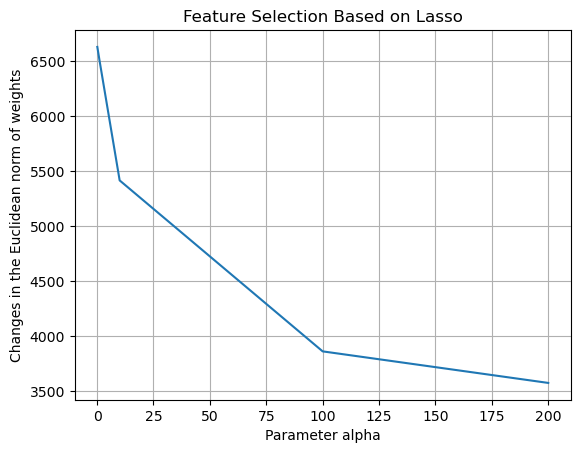

In [24]:
alphas=[0.1,1,10,100,200]
lassos=[]

for a in alphas:
    lasso1 = Lasso(alpha=a)
    lasso1.fit(X_train_diamond_new, y_train_diamond)
    lasso1_coef = np.linalg.norm(lasso1.coef_, ord=2)
    lassos.append(lasso1_coef)


plt.plot(alphas, lassos)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Parameter alpha")
plt.ylabel("Changes in the Euclidean norm of weights")
plt.show()

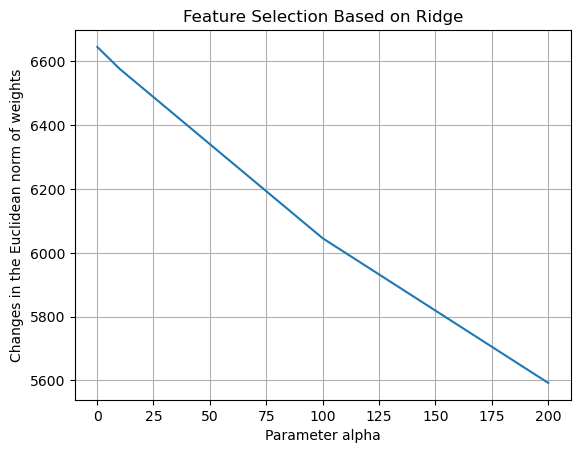

In [25]:
ridges=[]

for a in alphas:
    ridge1 = Ridge(alpha=a)
    ridge1.fit(X_train_diamond_new, y_train_diamond)
    ridge1_coef = np.linalg.norm(ridge1.coef_, ord=2)
    ridges.append(ridge1_coef)


plt.plot(alphas, ridges)
plt.grid()
plt.title("Feature Selection Based on Ridge")
plt.xlabel("Parameter alpha")
plt.ylabel("Changes in the Euclidean norm of weights")
plt.show()

**ВЫВОД:** Lasso уменьшает веса более агрессивно. Lasso-регрессию часто используют для отбора признаков, поскольку она добавляет штрафы за большие веса, а следовательно меет склонность к уменьшению некоторых коэффициентов до нуля, что означает исключение этих признаков из модели. Также Lasso-регрессия может помочь в решении проблемы мультиколлинеарности, при которой признаки сильно коррелируют друг с другом. Поскольку Lasso отбирает признаки и устанавливает некоторые из коэффициентов признаков в ноль, это может уменьшить влияние мультиколлинеарности на модель.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [26]:
lassocv = LassoCV(alphas=alphas, cv=5)
lassocv.fit(X_train_diamond_new, y_train_diamond)

mse = lassocv.mse_path_
alpha_order = lassocv.alphas_
mean_value = np.mean(mse, axis=0)

optimal_alpha_index = np.argmin(mean_value)
optimal_alpha = alpha_order[optimal_alpha_index]
optimal_mse = mean_value[optimal_alpha_index]

print("Optimal alpha:", optimal_alpha)
print("Mean squared error:", round(optimal_mse,2))

Optimal alpha: 1.0
Mean squared error: 1478951.07


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [27]:
lasso_2 = Lasso(alpha = 1).fit(X_train_diamond_new, y_train_diamond)
pd.DataFrame(zip(X_train_diamond.columns, lasso_2.coef_))

,0,1
0,carat,5239.102118
1,depth,-80.179927
2,table,-61.176885
3,x,-932.358220
4,y,0.000000
5,z,-135.512731
6,cut_Good,160.610414
7,cut_Ideal,397.860033
8,cut_Premium,324.892305
9,cut_Very Good,296.290423


**ВЫВОД:** Малоинформативными признаками являются depth, table, cut и color, а также y, ширина карата, наиболее информативными будут carat, clarity и длина карата, поскольку их оценки коэффициентов являются наиболее значительными по сравнению с другими. Данные коэффициенты вполне логичны и могут быть объснены за счет того, что количество карат и "чистота" это то, что в массовом сознании является наибольшей ценностью, порождает больший спрос, а следовательно и цену

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [28]:
print(f"Mean Square Error for test sample for ordinary regression is: {round(test_mse,2)}")
print(f"Mean Square Error for test sample for Lasso-regression is: {round(mean_squared_error(y_test_diamond, lasso_2.predict(X_test_diamond_new)),2)}")

Mean Square Error for test sample for ordinary regression is: 1268648.94
Mean Square Error for test sample for Lasso-regression is: 1268262.9


**ВЫВОД:** Лучше использовать модель Lasso-регрессии, поскольку она обладает меньшей среднеквадратичной ошибкой. Lasso штрафует за большие веса, что позволяет избежать мульколлинеарности и более точно предсказать таргет. Поскольку в нашем датасете наблюдалась мультиколлениарность, что означает, что признаки сильно скоррелированны между собой, предсказания с помощью обычной линейной моделью могут оказаться крайне неустойчивыми.

![alternatvie text](https://preview.redd.it/35zxe29ilin51.jpg?width=1080&crop=smart&auto=webp&s=89b749b37d298f02ab2c23588f7731123ad94f3e)